# Chicago taxi rides in 2016

***Work on "Chicago taxi rides in 2016" dataset including :*** 
    
-Clean the datasets (remove outliers, fill missing values)

-Compute interesting derivatives of the datasets

-Extract as many information as possible from the different datasets

-Visualize the data: Draw chart and plot to get more insight into the data


### Getting a sense of the data

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_df = []
for i in range (1,13):
    if i>=10:
        path = "./chicago-taxi-rides-2016/chicago_taxi_trips_2016_"
    else: 
        path = "./chicago-taxi-rides-2016/chicago_taxi_trips_2016_0"
    all_df.append(pd.read_csv(path+str(i)+".csv"))

In [3]:
data = pd.concat(all_df)

Check how many rows have latitude and longitude but not corresponding community area 

In [4]:
print(data[np.isfinite(data["pickup_community_area"]) & pd.isnull(data["pickup_latitude"]) & pd.isnull(data["pickup_longitude"]) ].shape)
print(data[np.isfinite(data["dropoff_community_area"]) & pd.isnull(data["pickup_latitude"]) & pd.isnull(data["pickup_longitude"]) ].shape)
print(data[np.isfinite(data["pickup_latitude"]) & np.isfinite(data["pickup_longitude"]) & pd.isnull(data["pickup_community_area"])].shape)
print(data[np.isfinite(data["dropoff_latitude"]) & np.isfinite(data["dropoff_longitude"]) & pd.isnull(data["dropoff_community_area"])].shape)

(0, 20)
(141660, 20)
(380, 20)
(38388, 20)


In [5]:
gp_pu = data.groupby(["pickup_latitude","pickup_longitude"]).first()

In [6]:
gp_pu[pd.isnull(gp_pu["pickup_community_area"])]

,,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,dropoff_latitude,dropoff_longitude
pickup_latitude,pickup_longitude,,,,,,,,,,,,,,,,,,
594.0,572.0,4549.0,2016-1-26 16:45:00,2016-1-26 16:45:00,0.0,0.0,NaN,553.0,NaN,76.0,3.25,0.0,0.0,0.0,3.25,Cash,107.0,594.0,572.0


In [7]:
gp_pu = data.groupby(["dropoff_latitude","dropoff_longitude"]).first()
gp_pu[pd.isnull(gp_pu["dropoff_community_area"])]

,,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude
dropoff_latitude,dropoff_longitude,,,,,,,,,,,,,,,,,,
594.0,572.0,1415.0,2016-1-11 20:15:00,2016-1-11 20:30:00,660.0,0.0,NaN,553.0,76.0,NaN,10.25,0.0,0.0,4.0,14.25,Cash,101.0,225.0,6.0


In [8]:
c_areas = np.unique(data["dropoff_community_area"].values)
c_areas = c_areas[~np.isnan(c_areas)]

In [9]:
c_areas

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.])

We see that the NaN values only come from one location with lat 594 and long 572. As all the 77 community areas are present in the dataset, I suppose that the missing values are explained by the fact that the corresponding locations do not correspond to the city of Chicago. I checked the longitude and latitude and it is indeed not part of the city of Chicago. I then decide to remove all rows with NaN value in the community area column.

In [10]:
data = data[np.isfinite(data['pickup_community_area'])]
data = data[np.isfinite(data['dropoff_community_area'])]

In [95]:
data[["trip_start_timestamp","trip_end_timestamp" ]].head()

,trip_start_timestamp,trip_end_timestamp
0,2016-1-13 06:15:00,2016-1-13 06:15:00
3,2016-1-23 17:30:00,2016-1-23 17:30:00
5,2016-1-8 18:15:00,2016-1-8 18:45:00
7,2016-1-26 04:15:00,2016-1-26 04:15:00
8,2016-1-22 11:30:00,2016-1-22 11:45:00


In [12]:
pu_nb = data["pickup_community_area"].value_counts()

In [13]:
do_nb = data["dropoff_community_area"].value_counts()

Text(0.5, 0, 'Community area')

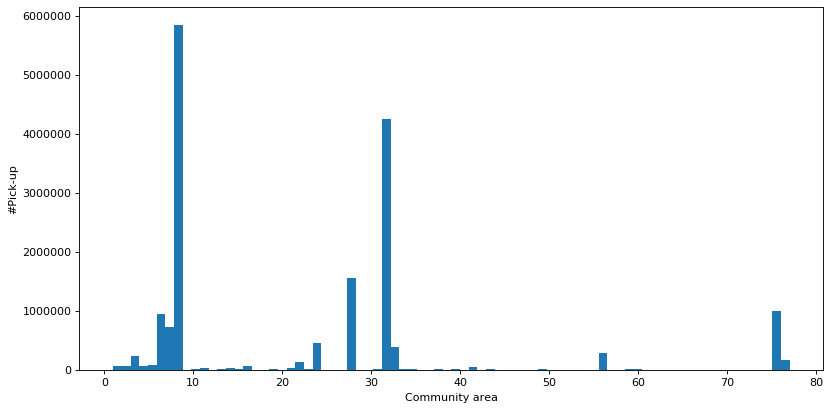

In [14]:
plt.figure(figsize=(12, 6), dpi = 80)
ax, _, _ = plt.hist(data["pickup_community_area"], bins = 78)
plt.ylabel('#Pick-up')
plt.xlabel('Community area')

Text(0.5, 0, 'Community area')

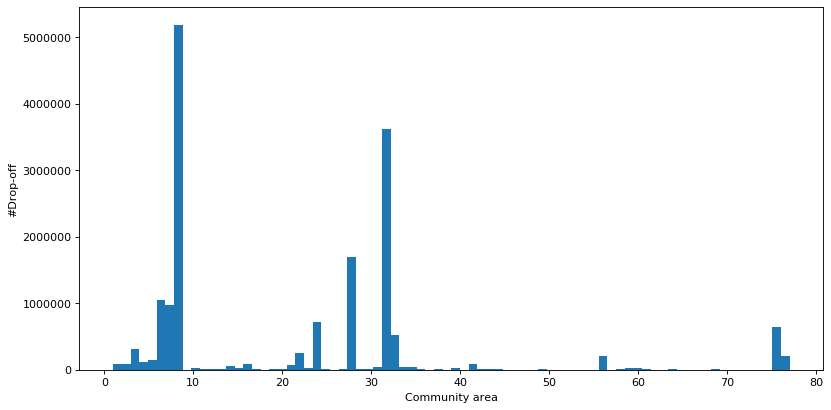

In [15]:
plt.figure(figsize=(12, 6), dpi = 80)
ax, _, _ = plt.hist(data["dropoff_community_area"], bins = 78)
plt.ylabel('#Drop-off')
plt.xlabel('Community area')

Very similar plots between drop off and pick up

Community areas with most pick-ups

In [16]:
pu_ca = pu_nb.sort_values(ascending = False).index

Community areas with most drop-offs

In [17]:
do_ca = do_nb.sort_values(ascending = False).index

In [18]:
pu_ca

Float64Index([ 8.0, 32.0, 28.0, 76.0,  6.0,  7.0, 24.0, 33.0, 56.0,  3.0, 77.0,
              22.0,  5.0,  4.0,  2.0,  1.0, 16.0, 41.0, 21.0, 14.0, 11.0, 35.0,
              34.0, 39.0, 59.0, 15.0, 31.0, 13.0, 10.0, 23.0, 38.0, 60.0, 43.0,
              49.0, 19.0, 42.0, 25.0, 44.0, 12.0, 27.0, 30.0, 20.0, 29.0, 69.0,
              61.0, 58.0, 36.0, 17.0, 40.0, 64.0, 68.0, 71.0, 62.0, 46.0, 57.0,
              67.0, 66.0, 37.0, 70.0, 45.0, 48.0, 51.0, 63.0, 26.0, 73.0, 65.0,
              50.0, 18.0,  9.0, 75.0, 72.0, 53.0, 47.0, 55.0, 52.0, 74.0,
              54.0],
             dtype='float64')

In [19]:
do_ca

Float64Index([ 8.0, 32.0, 28.0,  6.0,  7.0, 24.0, 76.0, 33.0,  3.0, 22.0, 56.0,
              77.0,  5.0,  4.0,  1.0, 16.0,  2.0, 41.0, 21.0, 14.0, 31.0, 35.0,
              34.0, 15.0, 23.0, 60.0, 39.0, 10.0, 59.0, 11.0, 13.0, 19.0, 38.0,
              12.0, 25.0, 42.0, 43.0, 29.0, 27.0, 30.0, 20.0, 17.0, 61.0, 49.0,
              58.0, 44.0, 69.0, 36.0, 64.0,  9.0, 40.0, 68.0, 57.0, 71.0, 72.0,
              66.0, 46.0, 70.0, 67.0, 26.0, 65.0, 63.0, 37.0, 62.0, 18.0, 48.0,
              73.0, 75.0, 45.0, 51.0, 50.0, 74.0, 53.0, 52.0, 47.0, 55.0,
              54.0],
             dtype='float64')

In [20]:
np.in1d(pu_ca[:15], do_ca[:15])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False])

In [21]:
np.in1d(pu_ca[71:], do_ca[71:])

array([ True,  True,  True,  True,  True,  True])

From now on we will work with the 15 less frequented areas 

In [120]:
less_freq = pu_ca[73:]

To affine my analysis I decide to study the sum of pick ups and dropoffs

In [24]:
less_freq_count = do_nb+pu_nb

In [25]:
less_freq_count = less_freq_count.sort_values().head(15)

Text(0.5, 0, '#PU+DO')

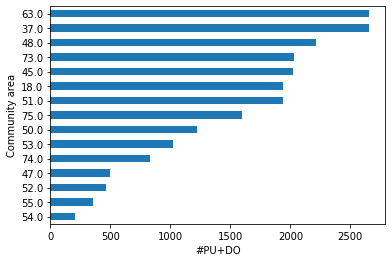

In [26]:
p = less_freq_count.plot(kind = 'barh')
p.set_ylabel("Community area")
p.set_xlabel('#PU+DO')

I'm going to stick with the 4 less frequented areas wich are : 
- RIVERDALE
- HEGEWISH
- EAST SIDE
- BURNSIDE

In [180]:
most_freq = pu_ca[2:10]
less_freq = [54.0, 55.0, 52.0, 47.0]

TODO : 
Pour les 4 => value count par heure (pour pickup puis pour drop off)=> additioner les values counts=> total de freq par heure.

In [88]:
def convert(s):
    if(len(s)> 7):
        hour = s.split(' ')[1]
        if hour[0] == '0':
            st = hour[1]
            return int(st)
        else:
            st = hour[:2]
            return int(st)
    

In [166]:
data["trip_start_hour"] = data["trip_start_timestamp"].apply(lambda x : convert(x))
data["trip_end_hour"] = data["trip_end_timestamp"].apply(lambda x : convert(x))

In [182]:
data_less_freq_pu = data[data["pickup_community_area"].isin(less_freq)]

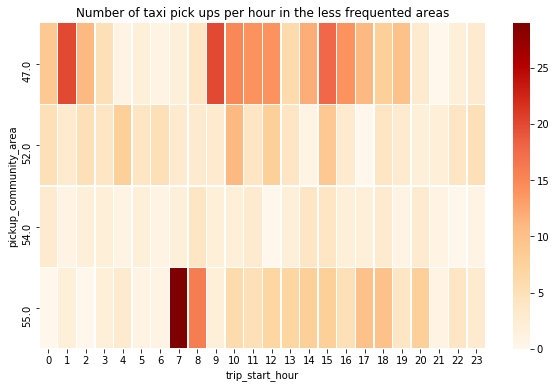

In [183]:
hour_pu = data_less_freq_pu[["pickup_community_area","trip_start_hour","taxi_id"  ]].groupby(["pickup_community_area", "trip_start_hour"]).count()
hour_pu = hour_pu.rename(columns={'taxi_id':'Count'})
hour_pu = hour_pu.reset_index()
hour_pu = hour_pu.pivot("pickup_community_area","trip_start_hour","Count").fillna(0)
fig, ax = plt.subplots(figsize=(10,6))      
plt.title("Number of taxi pick ups per hour in the less frequented areas")
sns.heatmap(hour_pu, linewidths=.5, ax=ax, cmap="OrRd")

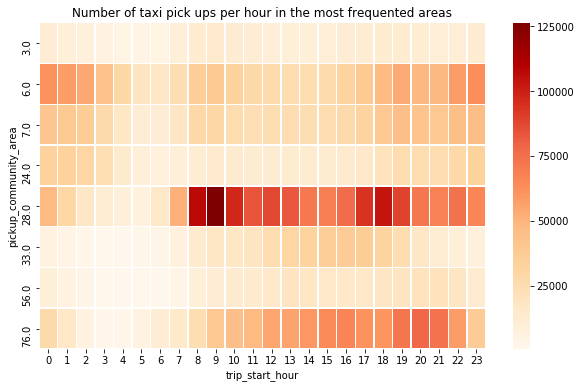

In [179]:
data_most_freq_pu = data[data["pickup_community_area"].isin(most_freq)]
hour_pu = data_most_freq_pu[["pickup_community_area","trip_start_hour","taxi_id"  ]].groupby(["pickup_community_area", "trip_start_hour"]).count()
hour_pu = hour_pu.rename(columns={'taxi_id':'Count'})
hour_pu = hour_pu.reset_index()
hour_pu = hour_pu.pivot("pickup_community_area","trip_start_hour","Count").fillna(0)
fig, ax = plt.subplots(figsize=(10,6))      
plt.title("Number of taxi pick ups per hour in the most frequented areas")
sns.heatmap(hour_pu, linewidths=.5, ax=ax, cmap="OrRd")

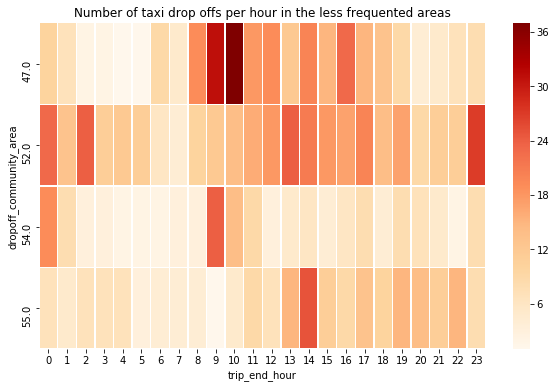

In [184]:
data_less_freq_do = data[data["dropoff_community_area"].isin(less_freq)]
hour_pu = data_less_freq_do[["dropoff_community_area","trip_end_hour","taxi_id"  ]].groupby(["dropoff_community_area", "trip_end_hour"]).count()
hour_pu = hour_pu.rename(columns={'taxi_id':'Count'})
hour_pu = hour_pu.reset_index()
hour_pu = hour_pu.pivot("dropoff_community_area","trip_end_hour","Count").fillna(0)
fig, ax = plt.subplots(figsize=(10,6))      
plt.title("Number of taxi drop offs per hour in the less frequented areas")
sns.heatmap(hour_pu, linewidths=.5, ax=ax, cmap="OrRd")

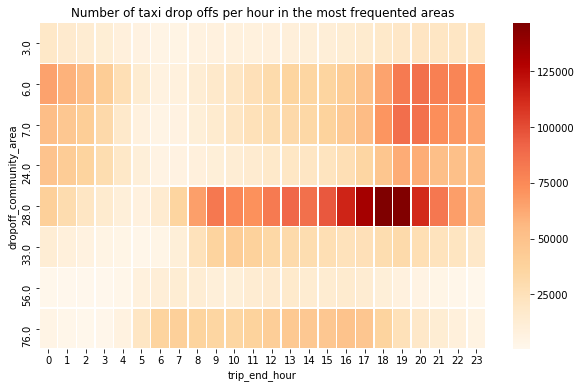

In [185]:
data_most_freq_pu = data[data["dropoff_community_area"].isin(most_freq)]
hour_pu = data_most_freq_pu[["dropoff_community_area","trip_end_hour","taxi_id"  ]].groupby(["dropoff_community_area", "trip_end_hour"]).count()
hour_pu = hour_pu.rename(columns={'taxi_id':'Count'})
hour_pu = hour_pu.reset_index()
hour_pu = hour_pu.pivot("dropoff_community_area","trip_end_hour","Count").fillna(0)
fig, ax = plt.subplots(figsize=(10,6))      
plt.title("Number of taxi drop offs per hour in the most frequented areas")
sns.heatmap(hour_pu, linewidths=.5, ax=ax, cmap="OrRd")

(https://upload.wikimedia.org/wikipedia/commons/9/94/Blank_Chicago_Community_Area_Map.png)